# Using FacetGrid, factorplot and lmplot

One of Seaborn's most powerful features is its ability to combine multiple smaller plots into a larger visualization that can help identify trends in data with many variables

The concept of small multiples is useful for analyzing data with many variables. The idea is that you can quickly identify trends in data by comparing multiple plots side by side using the same scales and axes. These plots are referred to as a trellis or lattice plot. In data science, this concept is also frequently called faceting. 

One very important requirement for Seaborn to create these plots is that the data must be in tidy format. This means that each row of the data is a single observation and the columns contain the variables. Once the data is in this format, Seaborn can perform a lot of the heavy lifting needed to create these small multiple plots.

### Building a FacetGrid
Seaborn's FacetGrid is the foundation for building data-aware grids. A data-aware grid allows you to create a series of small plots that can be useful for understanding complex data relationships

When building a FacetGrid, there are two steps:

1.- Create a FacetGrid object with columns, rows, or hue.

2.- Map individual plots to the grid.

In [1]:
#Importing packages
import io 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Reading csv
df=pd.read_csv("datasets//college_datav3.csv")
print(df.head())

                                INSTNM    OPEID  REGION  SAT_AVG_ALL  PCTPELL  \
0             Alabama A & M University   100200       5        850.0   0.7249   
1  University of Alabama at Birmingham   105200       5       1147.0   0.3505   
2                   Amridge University  2503400       5          NaN   0.7455   
3  University of Alabama in Huntsville   105500       5       1221.0   0.3179   
4             Alabama State University   100500       5        844.0   0.7567   

   PCTFLOAN  ADM_RATE_ALL       UG  AVGFACSAL COMPL_RPY_5YR_RT  ... CONTROL  \
0    0.8159      0.653841   4380.0     7017.0      0.477631579  ...       1   
1    0.5218      0.604275  10331.0    10221.0      0.673230442  ...       1   
2    0.8781           NaN     98.0     3217.0      0.636363636  ...       2   
3    0.4589      0.811971   5220.0     9514.0      0.762222222  ...       1   
4    0.7692      0.463858   4348.0     7940.0       0.43006993  ...       1   

  WOMENONLY  MENONLY  LOCALE  Tuition 

C:\Users\Yira\Anaconda\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


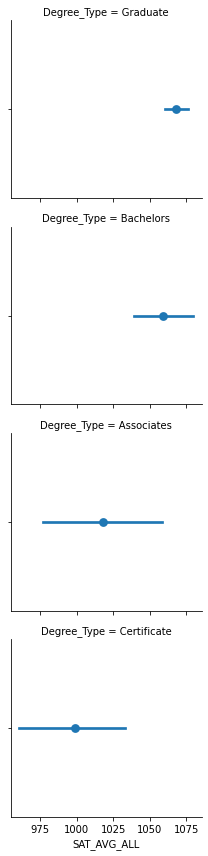

<Figure size 432x288 with 0 Axes>

In [8]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df,
                   row="Degree_Type",
                   row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

This plots tell us a lot about the relationships between Average SAT scores by Degree Types offered at a university.

### Using a factorplot
In many cases, Seaborn's factorplot() can be a simpler way to create a FacetGrid. Instead of creating a grid and mapping the plot, we can use the factorplot() to create a plot with one line of code.

For this exercise, we will recreate one of the plots from the previous exercise using factorplot() and show how to create a boxplot on a data-aware grid.

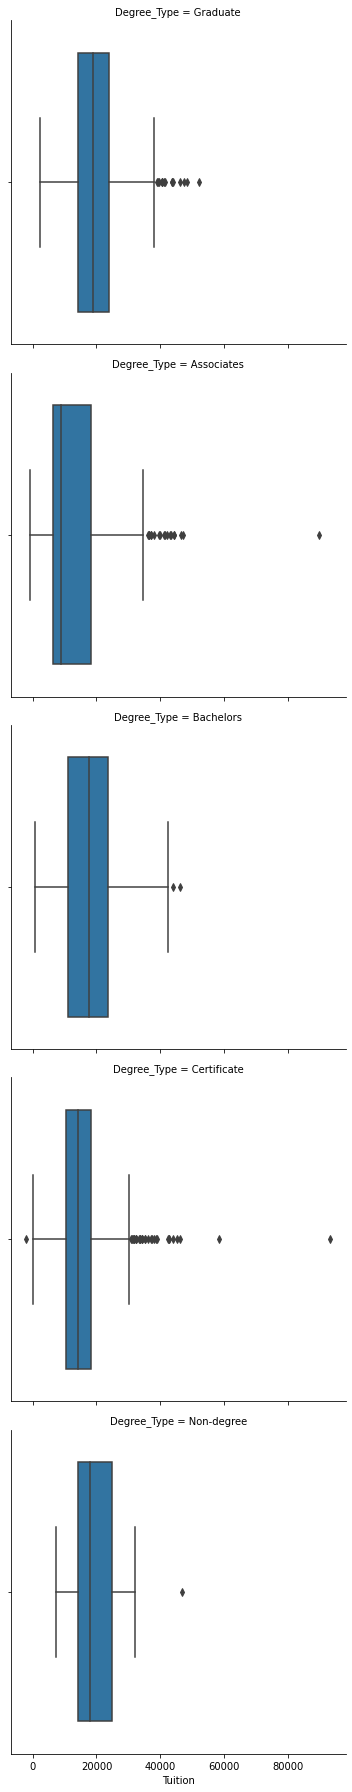

<Figure size 432x288 with 0 Axes>

In [10]:
# Create a factor plot that contains boxplots of Tuition values
sns.catplot(data=df,
         x='Tuition',
         kind='box',
         row='Degree_Type')

plt.show()
plt.clf()

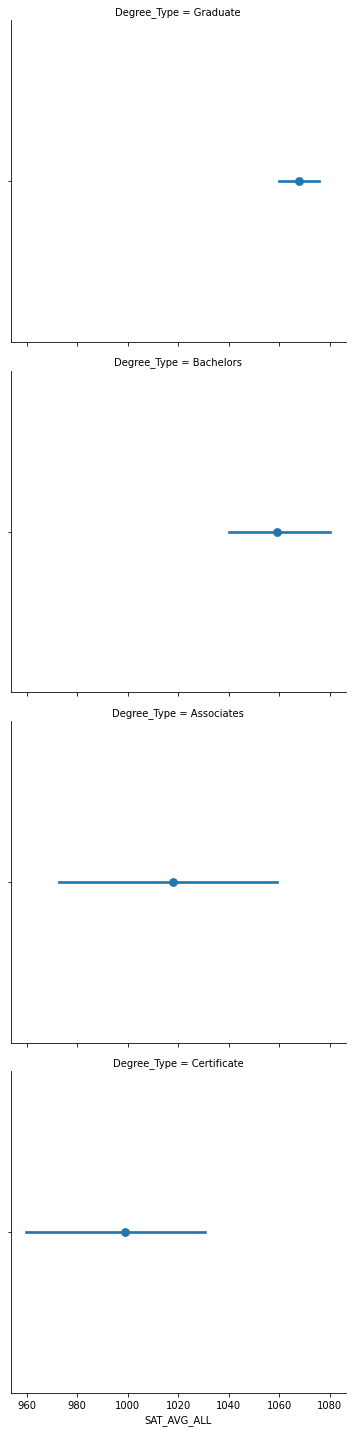

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.catplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

The factorplot is often more convenient than using a FacetGrid for creating data aware grids.

### Using a lmplot

The lmplot is used to plot scatter plots with regression lines on FacetGrid objects. The API is similar to factorplot with the difference that the default behavior of lmplot is to plot regression lines.

For the first set of exercises, we will look at the Undergraduate population (UG) and compare it to the percentage of students receiving Pell Grants (PCTPELL).

For the second lmplot exercise, we can look at the relationships between Average SAT scores and Tuition across the different degree types and public vs. non-profit schools.

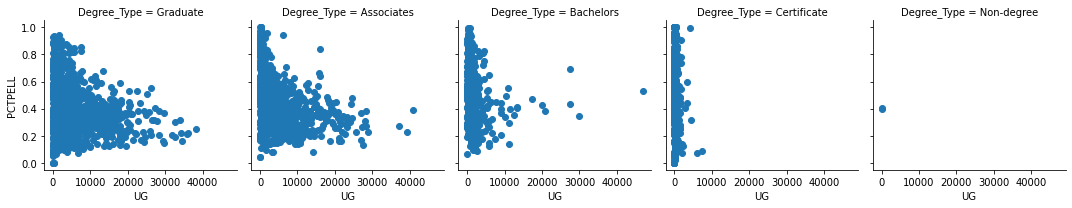

<Figure size 432x288 with 0 Axes>

In [14]:
# Create a FacetGrid varying by column 
g = sns.FacetGrid(df, col="Degree_Type")

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

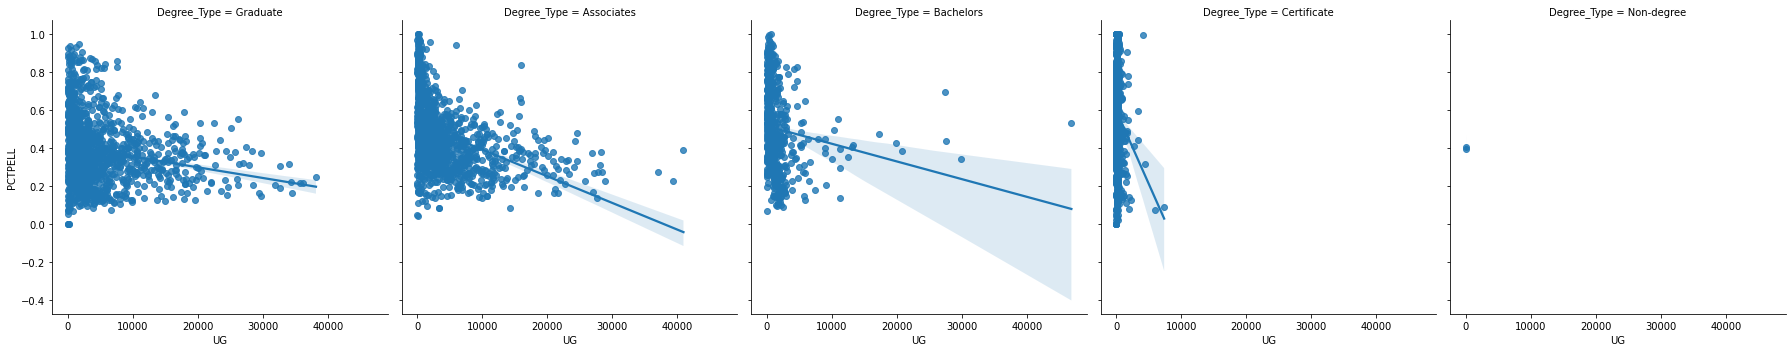

<Figure size 432x288 with 0 Axes>

In [15]:
# Re-create the previous plot as an lmplot
sns.lmplot(data=df,
        x='UG',
        y='PCTPELL',
        col="Degree_Type")

plt.show()
plt.clf()

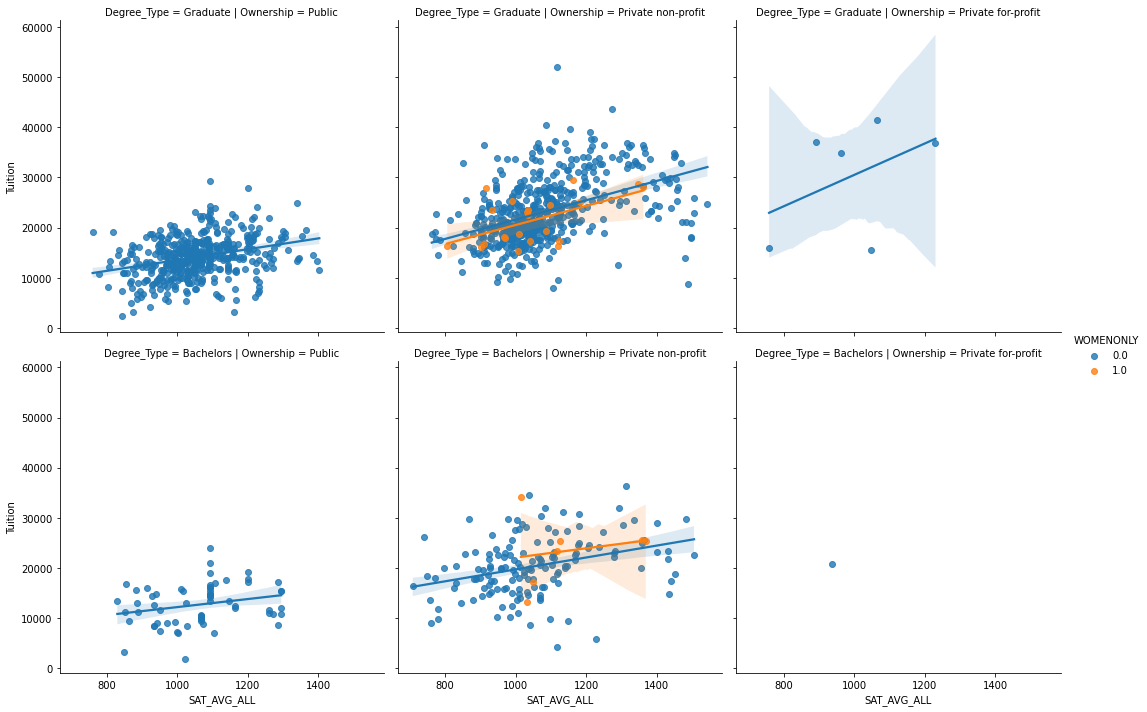

<Figure size 432x288 with 0 Axes>

In [17]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY')

plt.show()
plt.clf()

 Creating small multiples of plots is very useful for many types of analysis. With Seaborn, it is easy to use the plot types to quickly perform complex visualizations.